In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pycromanager import Bridge

# Create a PyCromanager bridge
bridge = Bridge()

# Load the microscope configuration (you should replace 'YourConfig.cfg' with your actual configuration file)
bridge.load_system_configuration('C:\Program Files\Micro-Manager-2.0\Kinetix-NXCT.cfg')

# Get the core object for microscope control
core = bridge.get_core()

# Set the acquisition settings (e.g., exposure time, channel, etc.)
core.set_exposure(100)  # Set exposure time in milliseconds
core.set_config('Theta')  # Replace 'YourChannel' with the desired channel name

# Acquire an image
image = core.snap_image()

# Convert the image to a NumPy array
image_data = np.array(image)

# Display the acquired image using Matplotlib
plt.imshow(image_data, cmap='gray')
plt.title('Acquired Image')
plt.axis('off')
plt.show()

# Clean up and disconnect from the microscope
bridge.close()



ImportError: cannot import name 'Bridge' from 'pycromanager' (C:\Users\AXIm Admin\AppData\Roaming\Python\Python39\site-packages\pycromanager\__init__.py)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pycromanager as pycro
from matplotlib.image import imsave

# Create an instance of the core for microscope control
core = pycro.Core()

# Load the microscope configuration (you should replace 'YourConfig.cfg' with your actual configuration file)
core.load_system_configuration('C:\Program Files\Micro-Manager-2.0\Kinetix-NXCT.cfg')

# Set the acquisition settings (e.g., exposure time, channel, etc.)
core.set_exposure(1000)  # Set exposure time in milliseconds
core.set_config('Mode', 'Sensitivity')  # Replace 'YourChannel' with the desired channel name

# Acquire an image
image = core.snap_image()

# Convert the image to a NumPy array
image_data = np.array(image)

file_path = 'acquired_image.tif'

# Save the acquired image
imsave(file_path, image_data)

# Clean up and disconnect from the microscope
#core.shutdown()



AttributeError: 'tuple' object has no attribute 'shape'

In [17]:
print(image)

None


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pycromanager as pycro

# Create an instance of the core for microscope control
core = pycro.Core()

# Load the microscope configuration (you should replace 'YourConfig.cfg' with your actual configuration file)
core.load_system_configuration('C:\Program Files\Micro-Manager-2.0\Kinetix-NXCT.cfg')

# Set the acquisition settings (e.g., exposure time, channel, etc.)
core.set_exposure(1000)  # Set exposure time in milliseconds
core.set_config('Mode', 'Speed')  # Replace 'YourChannel' with the desired channel name

try:
    # Acquire an image
    image = core.snap_image()
    
    # Check if the image is not None
    if image is not None:
        # Convert the image to a NumPy array
        image_data = np.array(image)
        
        # Display the acquired image using Matplotlib
        plt.imshow(image_data, cmap='gray')
        plt.title('Acquired Image')
        plt.axis('off')
        plt.show()
        
        # You can also save the image here using imsave if needed
    else:
        print("Failed to acquire an image.")
except Exception as e:
    print(f"An error occurred during image acquisition: {str(e)}")

# Clean up (No need to explicitly disconnect)


KeyboardInterrupt: 

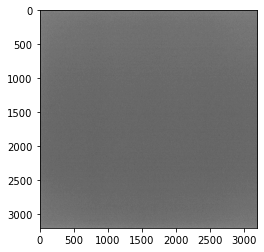

In [5]:
# This example shows how to use pycromanager to interact with the micro-manager core.
# Aside from the setup section, each following section can be run independently

from pycromanager import Core
import numpy as np
import matplotlib.pyplot as plt

#Setup
# get object representing MMCore
core = Core()

#### Calling core functions ###
exposure = core.get_exposure()


#### Setting and getting properties ####
# Here we set a property of the core itself, but same code works for device properties
auto_shutter = core.get_property('Core', 'AutoShutter')
core.set_property('Core', 'AutoShutter', 0)


#### Acquiring images ####
# The micro-manager core exposes several mechanisms foor acquiring images. In order to
# not interfere with other pycromanager functionality, this is the one that should be used
core.snap_image()
tagged_image = core.get_tagged_image()

# If using micro-manager multi-camera adapter, use core.getTaggedImage(i), where i is
# the camera index

# pixels by default come out as a 1D array. We can reshape them into an image
pixels = np.reshape(tagged_image.pix,
                        newshape=[tagged_image.tags['Height'], tagged_image.tags['Width']])
# plot it
plt.imshow(pixels, cmap='gray')
plt.show()

In [7]:
pip install tifffile

Note: you may need to restart the kernel to use updated packages.


In [10]:
import tifffile as tiff

In [11]:
file_path = 'output_image.tif'

# Save the NumPy array as a TIFF image
tiff.imsave(file_path, pixels)


In [ ]:
from pycromanager import Acquisition, multi_d_acquisition_events, start_headless

mm_app_path = 'C:\Program Files\Micro-Manager-2.0'
config_file = mm_app_path + "\Kinetix-NXCT.cfg"

# Start the Java process
start_headless(mm_app_path, config_file, timeout=5000)

save_dir = r"./"

def image_saved_fn(axes, dataset):
    pixels = dataset.read_image(**axes)
    # TODO: use the pixels for something, like post-processing or a custom image viewer

with Acquisition(directory=save_dir, name="tcz_acq", show_display=False,
                image_saved_fn=image_saved_fn,
                 ) as acq:
    events = multi_d_acquisition_events(
        num_time_points=5,
        z_start=0, z_end=6, z_step=0.4,
    )
    acq.acquire(events)

# Another way to access to the saved data
d = acq.get_dataset()

In [12]:
from pycromanager import Acquisition, multi_d_acquisition_events

with Acquisition(directory='/.', name='test_acq') as acq:
    events = multi_d_acquisition_events(num_time_points=5)
    acq.acquire(events)

Exception: Incorrect arguments. 
Expected java.lang.String, java.lang.String, boolean, boolean, int, int, int, int, boolean 
Got <class 'str'>, <class 'str'>, <class 'bool'>, <class 'int'>, <class 'bool'>

In [20]:
import pycromanager as pycro
import numpy as np
import matplotlib.pyplot as plt

# Create an instance of the core for microscope control
core = pycro.Core()

# Load the microscope configuration (you should replace 'YourConfig.cfg' with your actual configuration file)
core.load_system_configuration('C:\Program Files\Micro-Manager-2.0\Kinetix-NXCT.cfg')

# Set the acquisition settings (e.g., exposure time, channel, etc.)
core.set_exposure(1000)  # Set exposure time in milliseconds
core.set_config('Mode', 'Sensitivity')  # Replace 'YourChannel' with the desired channel name

try:
    # Create an acquisition request
    acq = pycro.Acquisition('./', 'Mode', False, False, 1, 1, 1, 1, False)
    
    acq.acquire()
    
    # Wait for the acquisition to complete
    acq.wait()
    
    # Get the acquired image from the acquisition
    image = acq.get_image(0)  # 0 corresponds to the first channel in the acquisition
    
    # Check if the image is not None
    if image is not None:
        # Convert the image to a NumPy array
        image_data = np.array(image)
        
        # Display the acquired image using Matplotlib
        plt.imshow(image_data, cmap='gray')
        plt.title('Acquired Image')
        plt.axis('off')
        plt.show()
        
        # You can also save the image here using imsave if needed
    else:
        print("Failed to acquire an image.")
except Exception as e:
    print(f"An error occurred during image acquisition: {str(e)}")

# Clean up (No need to explicitly disconnect)


An error occurred during image acquisition: Incorrect arguments. 
Expected java.lang.String, java.lang.String, boolean, boolean, int, int, int, int, boolean 
Got <class 'str'>, <class 'str'>, <class 'bool'>, <class 'int'>, <class 'bool'>


In [1]:
pip uninstall pycromanager

^C
Note: you may need to restart the kernel to use updated packages.
